In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

The process of <b>Hypothesis Testing</b> can be summarized by following three steps:

 - <b>Null Hypothesis:</b> The null hypothesis is a mode of the system based on the assumption that apparent effect was actually due to chance.

 - <b>p-value:</b> The p-value is the probability of the apparent effect under the null hypothesis.

 - <b>Interpretation:</b> Based on the p-value, we can conclude that whether the effect is statistically significant or not.
 
Henc to test a hypothesis, we assume that it is not real (called as <b>null hypothesis</b>). Based on the assumption (i.e. null hypothesis), we compute the probability of the apparent effect (this is called <b>p-value</b>). If p-value is low enough, we can conclude that the null hypothesis is unlikely to be true.

### 7.1 Testing a difference in means

<b>Null Hypothesis $H_0:$</b> The distributions (means) for the two groups are the same (apparent difference is due to the chance)

For pregnancy length, we observed n = 4413 first babies and m = 4735 others, and the difference in mean was d = 0.078 weeks. To approximate the p-value of this effect, the distribution is pooled, and samples with sizes n and m are generated and the difference in mean is computed. Difference in means of 1000 sampled pairs is computed and the CDF of distribution is shown in the figure below. There are 125 pairs for which difference in mean is greater than d, which is 0.078 and hence the p-value is 125/1000 = 0.125. So We can't reject the null hypothesis and can conclude that the apparent effect is not very likely.

Count for which differnce is greater than 0.078 (mean difference between first and other babies : 52


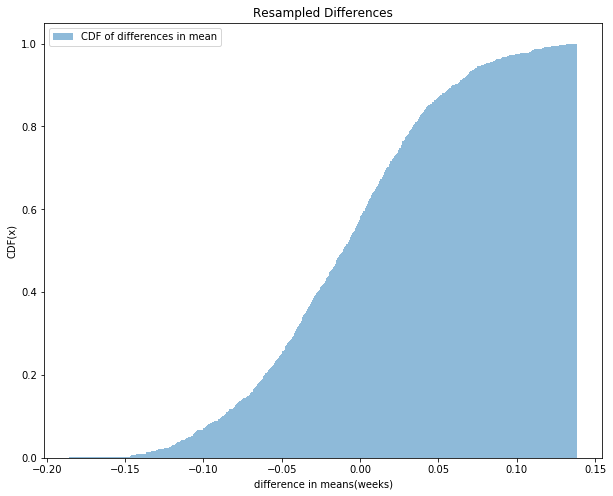

In [9]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])
babies = pregnancies[pregnancies['outcome'] == 1]['prglength']
mean = babies.mean()
std = babies.std()
delta = 0.078

def compute_diff(model1, model2, replace=True):
    sample1 = np.random.choice(model1, size=model1.shape[0], replace=replace)
    sample2 = np.random.choice(model2, size=model2.shape[0], replace=replace)
    return np.mean(sample1) - np.mean(sample2)

distribution = norm(loc=mean, scale=std)
sample_first = distribution.rvs(4413) # As number of first babies is 4413
sample_other = distribution.rvs(4735) # Number of others 4735

diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])
print("Count for which differnce is greater than 0.078 (mean difference between first and other babies : " +
      str((diffs > delta).sum()))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.distplot(diffs, label="CDF of differences in mean", bins=1000, kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': True})
ax.set_xlabel('difference in means(weeks)')
ax.set_ylabel('CDF(x)')
ax.set_title('Resampled Differences')
ax.legend()
plt.show()

<b>Exercise 7.1:</b> In the NSFG dataset, the difference in mean weight for first births is 2.0 ounces. Compute the p-value of this difference. For this kind of resampling it is important to sample with replacement.

As the samples for which difference is greater is 11 which gives a p-value of 0.011 and hence we can reject the null hypothesis and claim that there is a significant difference in mean weight for the first babies and others.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1.842283542317972
Count for which differnce is greater than the mean difference between first and other babies : 8


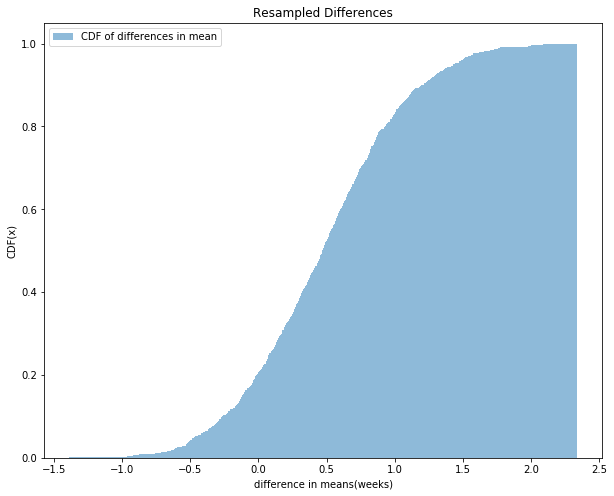

In [13]:
live_births = pregnancies[pregnancies["outcome"] == 1]
live_births["birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
pooled = live_births["birthwgt"].dropna()
first = live_births[live_births["birthord"] == 1]["birthwgt"].dropna()
other = live_births[live_births["birthord"] != 1]["birthwgt"].dropna()

delta = other.mean() - first.mean() 
print(delta)

pooled_mean = np.mean(pooled)
pooled_std = np.std(pooled)

distribution = norm(loc=pooled_mean, scale=pooled_std)
sample_first = distribution.rvs(first.shape[0]) 
sample_other = distribution.rvs(other.shape[0]) 

diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])
print("Count for which differnce is greater than the mean difference between first and other babies : " +
      str((diffs > delta).sum()))

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.distplot(diffs, label="CDF of differences in mean", bins=1000, kde=False, norm_hist=True, 
             hist_kws={"alpha": 0.5, 'cumulative': True})
ax.set_xlabel('difference in means(weeks)')
ax.set_ylabel('CDF(x)')
ax.set_title('Resampled Differences')
ax.legend()
plt.show()

### 7.2 Choosing a threshold

There are two types of error:
 - <b>Type 1 Error (False Positive):</b> When we accept a hypothesis that is actually false
 - <b>Type 2 Error (False Negative):</b> When we reject a hypothesis that is actually true
 
The most common approach for the hypothesis testing is to choose a threshold $\alpha$ for the <b>p-value</b> and reject the <b>Null Hypothesis</b> if p-value is <b>less than</b> $\alpha$. In this case the probability of <b>false positive</b> is $\alpha$ as the probability of rejecting null hypothesis which is the probability of accepting alternate hypothesis when it is actually false is the p-vlaue which can get a maximum value of $\alpha$. <b>We can decrease the chance of false positive by decreasing the threshold.</b> But by decreasing the threshold, we tend to increase the chance of rejecting the valid hypothesis as well and hence increasing the <b>Type 2 error(False Negative)</b>. The only way to decrease both at the same time is by <b>increasing the sample size.</b>
 
<b>Exercise 7.2:</b> To investigate the effect of sample size on p-value, see what happens if you discard half of the data from the NSFG. What if you discard three-quarters of the data, and so on? What is the smallest sample size where the difference in mean birth weight is still significant with $\alpha$ = 5%? How much larger does the sample size have
to be with $\alpha$ = 1%?

Results should enforce the claim that for lowe value of $\alpha$, the sample size should be higher.

In [14]:
fracs = [1.0, 0.5, 0.25, 0.33, 0.1, 0.05, 0.01, 0.005]
live_births = pregnancies[pregnancies["outcome"] == 1]
live_births["birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
pooled = live_births["birthwgt"].dropna()

for frac in fracs:
    pool_sample = np.random.choice(pooled, int(pooled.shape[0]*frac))
    pool_mean = pool_sample.mean()
    pool_std = pool_sample.std()
    first_sample = norm(loc=pooled_mean, scale=pooled_std).rvs(first.shape[0]) 
    other_sample = norm(loc=pooled_mean, scale=pooled_std).rvs(other.shape[0]) 
    diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])
    p_value = (diffs >= 1.842283542317972).sum()/diffs.shape[0]
    print("Sample Size = " + str(pool_sample.shape[0]) + " : p-value = " + str(p_value))

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Sample Size = 9087 : p-value = 0.006
Sample Size = 4543 : p-value = 0.007
Sample Size = 2271 : p-value = 0.009
Sample Size = 2998 : p-value = 0.013
Sample Size = 908 : p-value = 0.009
Sample Size = 454 : p-value = 0.011
Sample Size = 90 : p-value = 0.007
Sample Size = 45 : p-value = 0.009


### 7.3 Defining the effect

A test is called a <b>two-sided</b> test when we are testing the hypothesis that there is a significance difference between the distribution without specifying the sign of the difference. The alternative is to use <b>one-sided</b> test in which we ask something like that the "mean weight of first babies is significantly higher that that of the others". As the test is more specific, the p-vlaue is lower(roughly half) in this case.

### 7.4 Interpreting the result

The p-value can also be interpreted as P(E|$H_0$) which is probability of effect given the null hypothesis. There are several ways to interpret the results of a hypothesis testing:
 - <b>Classical:</b> When p-value is less than $\alpha$, we can cocnlude that the effect is statistically significant but we can not conclude that it is real.
 - <b>Practical:</b> In practical approach, we can conclude that the apparent effect is real. The lowe the p-value is, the higher the confidence of this conclusion.
 - <b>Bayesian:</b> What we really want to know is $P(H_A|E)$, where $H_A$ is the hypothesis that the effect is real. From Bayes's theorem:
 
 $$P(H_A|E) = \frac{P(E|H_A)P(H_A)}{P(E)}$$
 
 where P($H_A$) is the prior probability of $H_A$ befor we saw the effect, $P(E|H_A)$ is the probability of seeing E, assuming that the effect is real and P(E) is the probability of seeing E under any hypothesis which is given as:
 
 $$P(E) = P(E|H_A)P(H_A) + P(E|H_0)P(H_0)$$
 
<b>Exercise 7.3:</b> Using the data from the NSFG, what is the posterior probability that the distribution of birth weights is different for first babies and others?

The posterior probability is 0.67

In [15]:
live_births["birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
pooled = live_births["birthwgt"].dropna()
first = live_births[live_births["birthord"] == 1]["birthwgt"].dropna()
other = live_births[live_births["birthord"] != 1]["birthwgt"].dropna()

first_mean = first.mean()
other_mean = other.mean()
first_std = first.std()
other_std = other.std()

# Assumption: H_A is true, i.e. both the distrinutions are different = 1.8423
# We have to compute P(H_A|E) and for this we need P(E|H_A)
# We need to take samples from individual distributions

first_sample = norm(loc=first_mean, scale=first_std).rvs(first.shape[0]) 
other_sample = norm(loc=other_mean, scale=other_std).rvs(first.shape[0])

diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])
p_e_ha = (diffs >= 1.8423).sum()/diffs.shape[0]
p_e_h0 = 0.011 # Calculated earlier
p_ha = 0.5
p_h0 = 0.5
p_ha_e = (p_e_ha * p_ha) / (p_e_ha * p_ha + p_e_h0 * p_h0)
print("Posterior probability that birth weights are different is : " + str(p_ha_e))

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Posterior probability that birth weights are different is : 0.3125


### 7.5 Cross-validation

In the previous example, we used the same dataset to formulate $H_A$ and to test it. In this case, $P(H_A|E)$ is likely to be higher even when $H_A$ is false. We can address this problem by <b>cross-validation</b> which uses one dataset to formulate the hypothesis and another to test it. The first dataset is called the <b>training-set</b> and other the <b>test-set</b>.

The procedure is shown by the code below. The average posterior probability is 0.563 which is slightly lower than what we got in the previous result.

In [16]:
live_births["birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
pooled = live_births["birthwgt"].dropna()
first = np.array(live_births[live_births["birthord"] == 1]["birthwgt"].dropna())
other = np.array(live_births[live_births["birthord"] != 1]["birthwgt"].dropna())

count = 100
p = 0
for i in range(count):
    np.random.shuffle(first)
    np.random.shuffle(other)

    train_first = first[:int(len(first)/2)]
    test_first = first[int(len(first)/2):]

    train_other = other[:int(len(other)/2)]
    test_other = other[int(len(other)/2):]

    delta = train_other.mean() - train_first.mean()

    first_mean = test_first.mean()
    other_mean = test_other.mean()

    first_sample = norm(loc=first_mean, scale=first_std).rvs(first.shape[0]) 
    other_sample = norm(loc=other_mean, scale=other_std).rvs(first.shape[0])

    diffs = np.array([compute_diff(sample_first, sample_other) for x in range(1000)])
    p_e_ha = (diffs >= delta).sum()/diffs.shape[0]
    p_e_h0 = 0.011 # Calculated earlier
    p_ha = 0.5
    p_h0 = 0.5
    p_ha_e = (p_e_ha * p_ha) / (p_e_ha * p_ha + p_e_h0 * p_h0)
    p += p_ha_e
    
print("Posterior probability that birth weights are different is : " + str(p/count))

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Posterior probability that birth weights are different is : 0.4827809819500527


### 7.6 Reporting Bayesian probabilities

There are some objection to Bayesian probability as they depend on the prior probabilities. One response to this objection is that, in practice, starting with different priors tend to converge towards the same posterior probability as well. Another option is to report the <b>likelihood ratio</b> which is denoted as $P(E|H_A) / P(E|H_0)$ and hence posterior probability can be computed by giving their own priors.

<b>Exercise 7.4:</b> If your prior probability for a hypothesis, $H_A$, is 0.3 and new evidence becomes available that yields a likelihood ratio of 3 relative to the null hypothesis, $H_0$, what is your posterior probability for $H_A$?

<b>Solution:</b> Given, $P(H_A) = 0.3$ and $P(E|H_A) / P(E|H_0) = 3$. We have to compute $P(H_A|E)$, which is given as:

$$P(H_A|E) = \frac{P(E|H_A)P(H_A)}{P(E)} = \frac{P(E|H_A)P(H_A)}{P(E|H_A)P(H_A) + P(E|H_0)P(H_0)} = 
\frac{P(H_A)}{P(H_A) + \frac{P(E|H_0)}{P(E|H_A)}P(H_0)}$$

As $P(H_A) = 0.3$, $P(H_0) = 1-P(H_A) = 0.7$ and $\frac{P(E|H_0)}{P(E|H_A)} = 1/3$. Substituting the values in above equation we get,

$$P(H_A|E)  = \frac{P(H_A)}{P(H_A) + \frac{P(E|H_0)}{P(E|H_A)}P(H_0)} = \frac{0.3}{0.3 + \frac{0.7}{3}} = 0.5625$$

<b>Exercise 7.5:</b> Two people have left traces of their own blood at the scene of a crime. A suspect, Oliver, is tested and found to have type O blood. The blood groups of the two traces are found to be of type O (a common type in the local population, having frequency 60%) and of type AB (a rare type, with frequency 1%). Do these data (the blood types found at the scene) give evidence in favor of the proposition that Oliver was one of the two people whose blood was found at the scene?

<b>Solution:</b> Here $H_A:$ Oliver was one of the two people, and $E:$ Blood types found at the scene. We have to find $P(H_A|E).$

$P(E|H_A) = 0.01$ (As given $H_A$, oliver is one of the people found on the scene). $P(E|H_0) = 2*0.6*0.01 = 0.012$.
And Hence the evidence is more likely under $H_0$, givining the <b>likelihood ratio</b> as 10/12 which is less than 1.

### 7.7 Chi-square test

Sometimes we need to test the significance of the difference in variance, but variances are less robust than means. <b>Chi-square Statistics</b> is used to test whether there is significant difference in variance or not. The most common choice for chi-square statistic is:

$$\chi^{2} = \sum_{i} \frac{(O_i - E_i)^2}{E_i}$$

One feature of the chi-square test is that the distribution of the test statistic can be computed analytically.

<b>Exercise 7.6:</b> Suppose you run a casino and you suspect that a customer has replaced a die provided by the casino with a “crooked die;” that is, one that has been tampered with to make one of the faces more likely to come up than the others. You apprehend the alleged cheater and confiscate the die, but now you have to prove that it is crooked.

You roll the die 60 times and get the following results:
 - (Value, Frquency) : (1, 8), (2, 9), (3, 19), (4, 6), (5, 8), (6, 10)

What is the chi-squared statistic for these values? What is the probability of seeing a chi-squared value as large by chance?

<b>Solution:</b> The chi-square statistic is given as:
$$\chi^{2} = \frac{(10-8)^2 + (10-9)^2 + (10-19)^2 + (10-6)^2 + (10-8)^2 + (10-10)^2}{10} = 10.6$$

From the chi-square table (degree of freedom = 6), we get the p-value in the range 0.1 and 0.05, i.e. $0.05 \lt p-value \lt 0.1$. The exact p-value as given by the code is 0.0599 which confirms our hypothesis and hence we can reject null hypothesis that die is not crooked.

In [7]:
from scipy.stats import chisquare
chisquare([8, 9, 19, 6, 8, 10], f_exp=[10, 10, 10, 10, 10, 10])

Power_divergenceResult(statistic=10.6, pvalue=0.05991362580421519)

### 7.9 Power

When the result of a hypothesis test is negative (that is the effect is not statistically significant), the conclusion that whether the effect is real or not, depends on the power of the test.

Statistical <b>power</b> is the probability that the test will be positive if the null hypothesis is false. The power of a test depends on the sample size, the magnitude of the effect and the threshold $\alpha$.

<b>Exerceise 7.7:</b> What is the power of the test in Section 7.2, using $\alpha$ = 0.05 and assuming that the actual difference between the means is 0.078 weeks? 

You can estimate power by generating random samples from distributions with the given difference in the mean, testing the observed difference in the mean, and counting the number of positive tests.

What is the power of the test with $\alpha$ = 0.10?

<b>Solution:</b> The power of the test for $\alpha$ = 0.05 is 91.8% and for $\alpha$ = 0.10 is 95.7%.

In [17]:
import scipy.stats
import numpy as np

live_births["birthwgt"] = 16 * live_births["birthwgt_lb"] + live_births["birthwgt_oz"]
pooled = live_births["birthwgt"].dropna()
first = np.array(live_births[live_births["birthord"] == 1]["birthwgt"].dropna())
other = np.array(live_births[live_births["birthord"] != 1]["birthwgt"].dropna())

first_mean = first.mean()
first_std = first.std()
other_mean = other.mean()
other_std = other.std()

num_simulations = 1000
# store the p value for each simulation
sim_p = np.empty(num_simulations)
sim_p.fill(np.nan)

for i_sim in range(num_simulations):
    fisrt_samples = scipy.stats.norm(loc=first_mean, scale=first_std).rvs(first.shape[0])
    other_samples = scipy.stats.norm(loc=other_mean, scale=other_std).rvs(other.shape[0])
    res = scipy.stats.ttest_ind(fisrt_samples, other_samples, axis=0, equal_var=False)
    sim_p[i_sim] = res[1]

print("Power of the test for alpha = 0.05 is: " + str(np.sum(sim_p < 0.05)/float(num_simulations)))
print("Power of the test for alpha = 0.10 is: " + str(np.sum(sim_p < 0.10)/float(num_simulations)))

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Power of the test for alpha = 0.05 is: 0.91
Power of the test for alpha = 0.10 is: 0.947
